In [2]:
pip install yfinance


  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.6 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 7.7 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 16.0 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 18.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:

In [12]:
import yfinance as yf


# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'NVDA' ,'GOOGL', 'AI', 'GOOG', 'AMZN', 'META', 'TSM', 'TSLA', 'PINS' ]

# Download data for multiple stocks
data = yf.download(tickers, start='2023-01-01', end='2024-07-27')

print(data)


[*********************100%%**********************]  11 of 11 completed

Price        Adj Close                                                 \
Ticker            AAPL         AI        AMZN        GOOG       GOOGL   
Date                                                                    
2023-01-03  124.048050  11.070000   85.820000   89.598038   89.017838   
2023-01-04  125.327507  11.340000   85.139999   88.609169   87.979027   
2023-01-05  123.998451  10.810000   83.120003   86.671371   86.101181   
2023-01-06  128.560852  10.950000   86.080002   88.059799   87.239868   
2023-01-09  129.086548  11.230000   87.360001   88.699066   87.919090   
...                ...        ...         ...         ...         ...   
2024-07-22  223.960007  28.049999  182.550003  183.350006  181.669998   
2024-07-23  225.009995  28.379999  186.410004  183.600006  181.789993   
2024-07-24  218.539993  26.459999  180.830002  174.369995  172.630005   
2024-07-25  217.490005  26.840000  179.850006  169.160004  167.279999   
2024-07-26  217.960007  27.730000  182.500000  168.

In [13]:
# Drop rows with missing values
data = data.dropna()

# Normalize the closing prices for better comparison
normalized_data = data['Close'] / data['Close'].iloc[0]

print(normalized_data)

Ticker          AAPL        AI      AMZN      GOOG     GOOGL      META  \
Date                                                                     
2023-01-03  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2023-01-04  1.010314  1.024390  0.992076  0.988963  0.988330  1.021084   
2023-01-05  0.999600  0.976513  0.968539  0.967336  0.967235  1.017637   
2023-01-06  1.036380  0.989160  1.003030  0.982832  0.980027  1.042328   
2023-01-09  1.040617  1.014453  1.017945  0.989967  0.987657  1.037919   
...              ...       ...       ...       ...       ...       ...   
2024-07-22  1.790677  2.533875  2.127127  2.044036  2.038487  3.907327   
2024-07-23  1.799072  2.563686  2.172104  2.046823  2.039834  3.917669   
2024-07-24  1.747341  2.390244  2.107085  1.943924  1.937051  3.697852   
2024-07-25  1.738946  2.424571  2.095665  1.885842  1.877020  3.634841   
2024-07-26  1.742704  2.504968  2.126544  1.880491  1.873878  3.733366   

Ticker          MSFT      NVDA      P

In [14]:
normalized_data.to_csv('normalized_stock_data.csv')

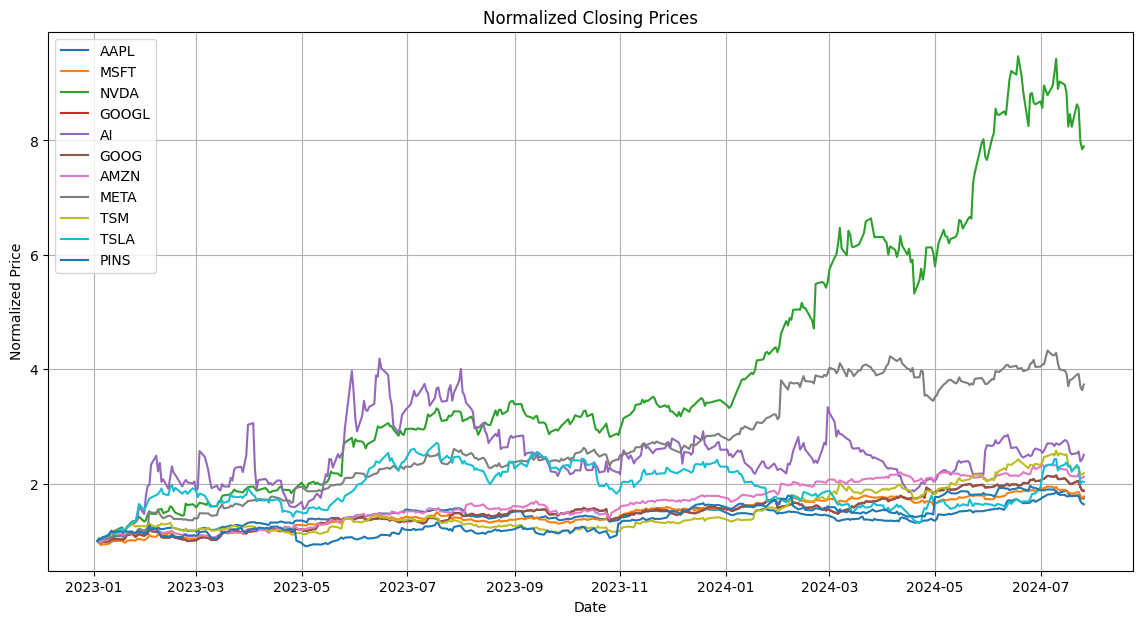

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(normalized_data[ticker], label=ticker)
plt.title('Normalized Closing Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.savefig('normalized_closing_prices.png')
plt.show()